In [1]:
import h5py
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
import matplotlib.cm as cm
from scipy.signal import savgol_filter
from scipy import stats

batch1 = pickle.load(open(r'D:\논문 준비\코드 복사\코드 복사\코드 복사\batch1.pkl', 'rb'))
#remove batteries that do not reach 80% capacity
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']

numBat1 = len(batch1.keys())

batch2 = pickle.load(open(r'D:\논문 준비\코드 복사\코드 복사\코드 복사\batch2.pkl','rb'))
# There are four cells from batch1 that carried into batch2, we'll remove the data from batch2
# and put it with the correct cell from batch1
batch2_keys = ['b2c7', 'b2c8', 'b2c9', 'b2c15', 'b2c16']
batch1_keys = ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4']
add_len = [662, 981, 1060, 208, 482];

for i, bk in enumerate(batch1_keys):
    batch1[bk]['cycle_life'] = batch1[bk]['cycle_life'] + add_len[i]
    for j in batch1[bk]['summary'].keys():
        if j == 'cycle':
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j] + len(batch1[bk]['summary'][j])))
        else:
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j]))
    last_cycle = len(batch1[bk]['cycles'].keys())
    for j, jk in enumerate(batch2[batch2_keys[i]]['cycles'].keys()):
        batch1[bk]['cycles'][str(last_cycle + j)] = batch2[batch2_keys[i]]['cycles'][jk]

del batch2['b2c7']
del batch2['b2c8']
del batch2['b2c9']
del batch2['b2c15']
del batch2['b2c16']

numBat2 = len(batch2.keys())

batch3 = pickle.load(open(r'D:\논문 준비\코드 복사\코드 복사\코드 복사\batch3.pkl','rb'))
# remove noisy channels from batch3
del batch3['b3c37']
del batch3['b3c2']
del batch3['b3c23']
del batch3['b3c32']
del batch3['b3c38']
del batch3['b3c39']

numBat3 = len(batch3.keys())
numBat = numBat1 + numBat2 + numBat3
bat_dict = {**batch1, **batch2, **batch3}

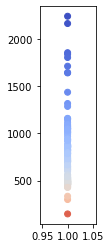

In [2]:
# 색 조절.
color=[]
cycle_=[]
plt.figure(figsize=(1,4))
for i,j in enumerate(bat_dict.keys()):
    sortcycle=bat_dict[j]['cycle_life']
    cycle_.append(sortcycle.tolist())
    c=(np.log10(sortcycle)-2)/(np.log10(2300)-2)
    color.append(c.tolist())

a=np.array(color).ravel()
b=np.array(cycle_).ravel()
chargecolor=cm.coolwarm_r(a)
plt.scatter(np.ones(len(a)),b,c=cm.coolwarm_r(a))

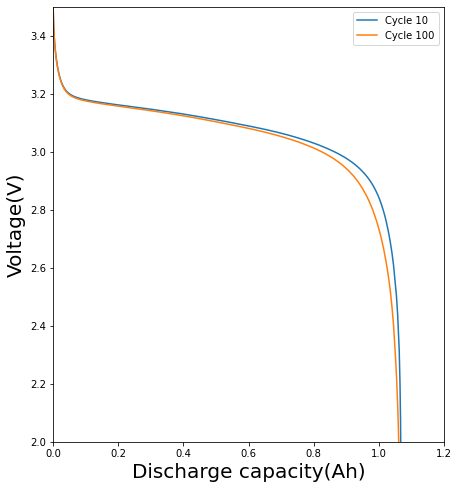

In [3]:
#선형보간된 방전용량.
for i,j in enumerate(bat_dict.keys()):
    if not i==25:
        continue
    Qdlin10,Qdlin100=bat_dict[j]['cycles']['9']['Qdlin'],bat_dict[j]['cycles']['99']['Qdlin']
    plt.figure(figsize=(7,8))
    plt.plot(Qdlin10,np.linspace(3.5,2.0,1000),label='Cycle 10')
    plt.plot(Qdlin100,np.linspace(3.5,2.0,1000),label='Cycle 100')
    plt.xlabel('Discharge capacity(Ah)',fontsize=20)
    plt.ylabel('Voltage(V)',fontsize=20)
    plt.axis([0,1.2,2.0,3.5])
    plt.legend()
    plt.show()

b3c16
b3c17
b3c42
b3c43


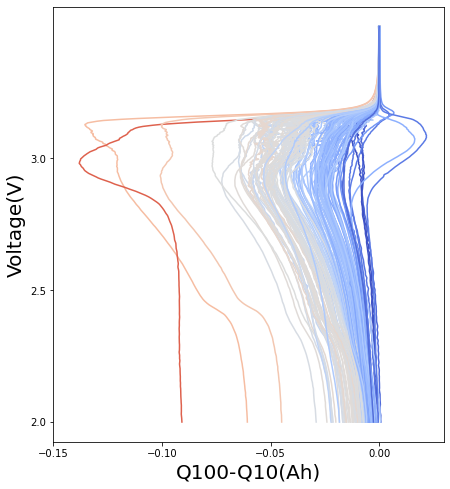

In [6]:
# 6, 20, 22 ,93 제외
plt.figure(figsize=(7,8))
for i,j in enumerate(bat_dict.keys()):
    Qdlin10,Qdlin100=bat_dict[j]['cycles']['9']['Qdlin'],bat_dict[j]['cycles']['99']['Qdlin']
    diff=Qdlin100-Qdlin10
    if np.any(diff>0.003):
        print(j)
    plt.plot(diff,np.linspace(3.5,2.0,1000),color=chargecolor[i])
    plt.xlabel('Q100-Q10(Ah)',fontsize=20)
    plt.ylabel('Voltage(V)',fontsize=20)
    plt.xticks(np.arange(-0.15, 0.05, 0.05))
    plt.yticks(np.arange(2.0,3.5,0.5))
plt.show()

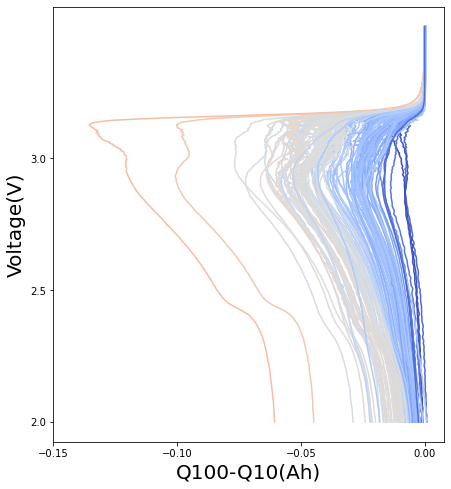

In [7]:
# 6, 7,9,22 ,123 제외
plt.figure(figsize=(7,8))
for i,j in enumerate(bat_dict.keys()):
    if j=='b3c16':
        continue
    if j=='b3c17':
        continue
    if j=='b3c42':
        continue
    if j=='b3c43':
        continue
    if j=='b2c1':
        continue
    Qdlin10,Qdlin100=bat_dict[j]['cycles']['9']['Qdlin'],bat_dict[j]['cycles']['99']['Qdlin']
    diff=Qdlin100-Qdlin10
    plt.plot(diff,np.linspace(3.5,2.0,1000),color=chargecolor[i])
    plt.xlabel('Q100-Q10(Ah)',fontsize=20)
    plt.ylabel('Voltage(V)',fontsize=20)
    plt.xticks(np.arange(-0.15, 0.05, 0.05))
    plt.yticks(np.arange(2.0,3.5,0.5))
plt.show()

window_size 홀수만:101
polynomial order:5


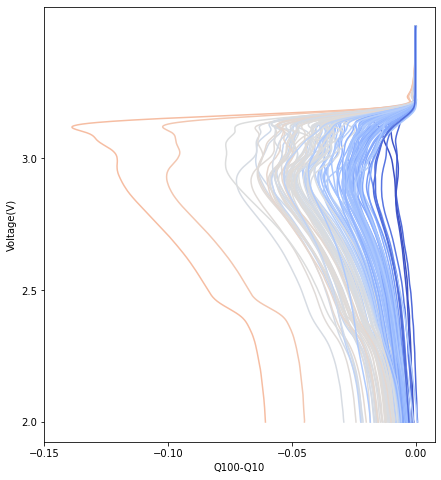

In [6]:
# 6, 20, 22 ,93 제외
i_w=int(input('window_size 홀수만:'))
i_p=int(input('polynomial order:'))
plt.figure(figsize=(7,8))
for i,j in enumerate(bat_dict.keys()):
    if j=='b3c16':
        continue
    if j=='b3c17':
        continue
    if j=='b3c42':
        continue
    if j=='b3c43':
        continue
    if j=='b2c1':
        continue
    Qdlin10,Qdlin100=bat_dict[j]['cycles']['9']['Qdlin'],bat_dict[j]['cycles']['99']['Qdlin']
    diff=Qdlin100-Qdlin10
    hat = savgol_filter(diff, i_w, i_p)
    plt.plot(hat,np.linspace(3.5,2.0,1000),color=chargecolor[i])
    plt.xlabel('Q100-Q10')
    plt.ylabel('Voltage(V)')
    plt.xticks(np.arange(-0.15, 0.05, 0.05))
    plt.yticks(np.arange(2.0,3.5,0.5))
plt.show()

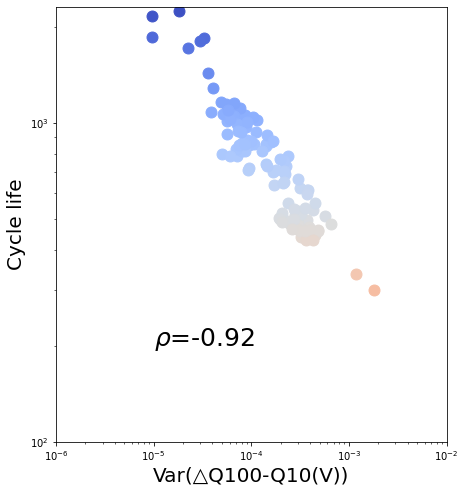

In [8]:
# 6, 20, 22 ,93 ,123 제외
plt.figure(figsize=(7,8))
Cycle=[]
VAR=[]
for i,j in enumerate(bat_dict.keys()):
    if j=='b3c16':
        continue
    if j=='b3c17':
        continue
    if j=='b3c42':
        continue
    if j=='b3c43':
        continue
    if j=='b2c1':
        continue
    Qdlin10,Qdlin100=bat_dict[j]['cycles']['9']['Qdlin'],bat_dict[j]['cycles']['99']['Qdlin']
    diff=Qdlin100-Qdlin10
    var,cycle=np.var(diff),bat_dict[j]['cycle_life'].tolist()
    VAR.append(var)
    Cycle.append(cycle)
    plt.scatter(var,cycle,s=120,color=chargecolor[i])
    plt.xscale('log')
    plt.yscale('log')
    plt.axis([10**(-6),10**(-2),100,2300])
    plt.xlabel('Var(△Q100-Q10(V))',fontsize=20)
    plt.ylabel('Cycle life',fontsize=20)
x_val=np.array(VAR)
y_val=np.array(Cycle).ravel()
X_val=np.log10(np.abs(x_val))
Y_val=np.log10(y_val)
r = np.round(np.corrcoef(X_val, Y_val),2)
font={'size':25}
plt.text(10**(-5),200,r'$\rho$''={}'.format(r[0, 1]),fontdict=font)
plt.show()

In [8]:
print(batch1.keys())

dict_keys(['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4', 'b1c5', 'b1c6', 'b1c7', 'b1c9', 'b1c11', 'b1c14', 'b1c15', 'b1c16', 'b1c17', 'b1c18', 'b1c19', 'b1c20', 'b1c21', 'b1c23', 'b1c24', 'b1c25', 'b1c26', 'b1c27', 'b1c28', 'b1c29', 'b1c30', 'b1c31', 'b1c32', 'b1c33', 'b1c34', 'b1c35', 'b1c36', 'b1c37', 'b1c38', 'b1c39', 'b1c40', 'b1c41', 'b1c42', 'b1c43', 'b1c44', 'b1c45'])


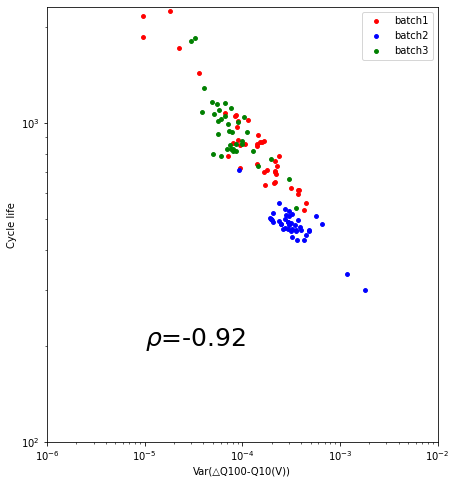

In [9]:
# 6, 20, 22 ,93 ,123 제외
plt.figure(figsize=(7,8))
Cycle1=[]
VAR1=[]
Cycle2=[]
VAR2=[]
Cycle3=[]
VAR3=[]
for i,j in enumerate(batch1.keys()):
    Qdlin10,Qdlin100=bat_dict[j]['cycles']['9']['Qdlin'],bat_dict[j]['cycles']['99']['Qdlin']
    diff=Qdlin100-Qdlin10
    var,cycle=np.var(diff),bat_dict[j]['cycle_life'].tolist()
    VAR1.append(var)
    Cycle1.append(cycle)
Cycle1_=np.array(Cycle1).ravel()
plt.scatter(VAR1,Cycle1_,s=15,color='red',label='batch1')
for i,j in enumerate(batch2.keys()):
    if j=='b2c1':
        continue
    Qdlin10,Qdlin100=bat_dict[j]['cycles']['9']['Qdlin'],bat_dict[j]['cycles']['99']['Qdlin']
    diff=Qdlin100-Qdlin10
    var,cycle=np.var(diff),bat_dict[j]['cycle_life'].tolist()
    VAR2.append(var)
    Cycle2.append(cycle)
Cycle2_=np.array(Cycle2).ravel()    
plt.scatter(VAR2,Cycle2_,s=15,color='blue',label='batch2')
for i,j in enumerate(batch3.keys()):
    if j=='b3c16':
        continue
    if j=='b3c17':
        continue
    if j=='b3c42':
        continue
    if j=='b3c43':
        continue
    Qdlin10,Qdlin100=bat_dict[j]['cycles']['9']['Qdlin'],bat_dict[j]['cycles']['99']['Qdlin']
    diff=Qdlin100-Qdlin10
    var,cycle=np.var(diff),bat_dict[j]['cycle_life'].tolist()
    VAR3.append(var)
    Cycle3.append(cycle)
Cycle3_=np.array(Cycle3).ravel()      
plt.scatter(VAR3,Cycle3_,s=15,color='green',label='batch3')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Q100-Q10')
plt.ylabel('Voltage(V)')
plt.axis([10**(-6),10**(-2),100,2300])
plt.xlabel('Var(△Q100-Q10(V))')
plt.ylabel('Cycle life')
x_val=np.array(VAR)
y_val=np.array(Cycle).ravel()
X_val=np.log10(x_val)
Y_val=np.log10(y_val)
r = np.round(np.corrcoef(X_val, Y_val),2)
font={'size':25}
plt.text(10**(-5),200,r'$\rho$''={}'.format(r[0, 1]),fontdict=font)
plt.legend()
plt.show()

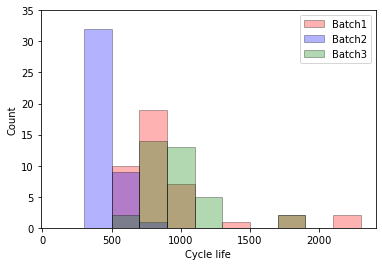

In [10]:
bins=np.arange(100,2500,200)# width 조절
plt.hist(Cycle1_,bins,edgecolor='k',alpha=0.3,color='red',label='Batch1')
plt.hist(Cycle2_,bins,edgecolor='k',alpha=0.3,color='blue',label='Batch2')
plt.hist(Cycle3_,bins,edgecolor='k',alpha=0.3,color='green',label='Batch3')
plt.ylim(0,35)
plt.xlabel('Cycle life')
plt.ylabel('Count')
plt.legend()

    Var(△Q100-Q10(V))  Cycle life   data_
0           -5.014861      1852.0  Batch1
1           -5.013960      2160.0  Batch1
2           -4.737000      2237.0  Batch1
3           -4.442613      1434.0  Batch1
4           -4.647744      1709.0  Batch1
..                ...         ...     ...
31          -4.253458       923.0  Batch3
32          -4.295108       796.0  Batch3
33          -4.219509       786.0  Batch3
34          -4.131496       940.0  Batch3
35          -4.520851      1801.0  Batch3

[119 rows x 3 columns]


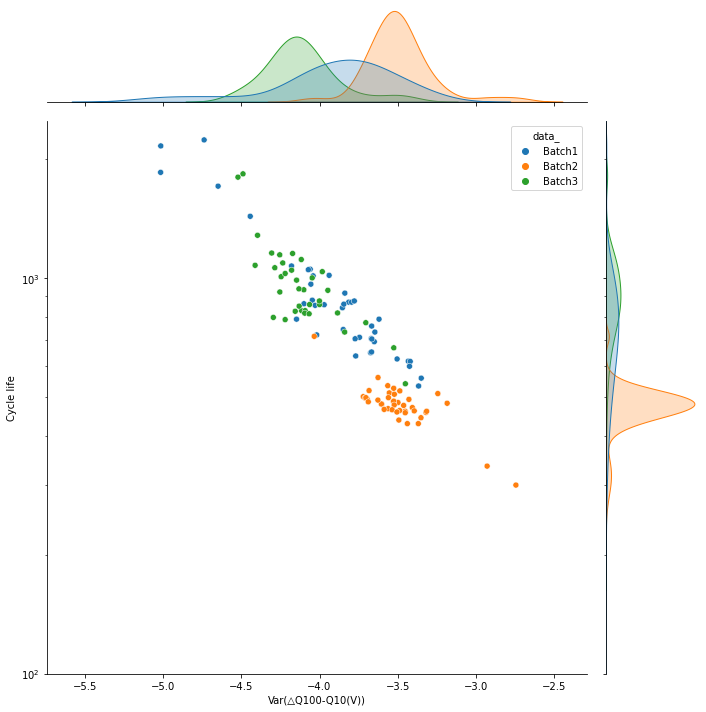

In [15]:
import seaborn as sns
data1={'Var(△Q100-Q10(V))':np.log10(VAR1),'Cycle life':Cycle1_}
df1=pd.DataFrame(data1)
df1['data_']='Batch1'
data2={'Var(△Q100-Q10(V))':np.log10(VAR2),'Cycle life':Cycle2_}
df2=pd.DataFrame(data2)
df2['data_']='Batch2'
data3={'Var(△Q100-Q10(V))':np.log10(VAR3),'Cycle life':Cycle3_}
df3=pd.DataFrame(data3)
df3['data_']='Batch3'
df_sum=pd.concat([df1,df2,df3])
print(df_sum)

sns.jointplot(x='Var(△Q100-Q10(V))',y='Cycle life',data=df_sum,ylim=(100,2500),hue='data_',
              height=10)
plt.yscale('log')
plt.show()

In [10]:
# 다음코드는 다른 파일

[-5.01486104 -5.01395962 -4.73699974 -4.44261336 -4.64774366 -4.17887796
 -3.7688779  -3.81348608 -4.05938368 -4.14689653 -4.04606984 -4.0179491
 -4.09941368 -3.97015945 -3.65008055 -3.61990683 -3.36723741 -3.35033805
 -4.04079364 -3.93866252 -4.02788882 -3.79522    -3.8537032  -3.84471181
 -3.8382817  -3.74469922 -3.77773262 -3.6464635  -3.6670576  -3.84861616
 -3.77260582 -3.66950134 -3.67393889 -3.43304817 -3.50453372 -4.05521271
 -4.07151397 -3.66585579 -3.66777907 -3.4207     -3.42529224] [3.26764098 3.33445375 3.34966598 3.15654915 3.23274206 3.03100428
 2.80345712 2.93951925 3.02284061 2.89652622 2.94448267 2.85672889
 2.93550727 2.93298082 2.83947805 2.89652622 2.72754126 2.74741181
 3.00603795 3.00732095 2.93145787 2.93951925 2.92531209 2.93449845
 2.96236934 2.85064624 2.94250411 2.86391738 2.87909588 2.87040391
 2.84695533 2.84757266 2.81157501 2.79028516 2.79588002 2.98497713
 3.02160272 2.84633711 2.81358099 2.78958071 2.77742682]


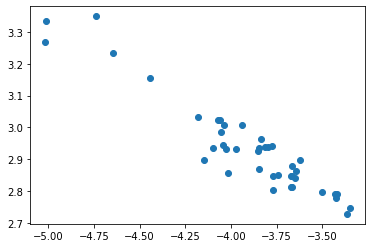

In [11]:
from sklearn.linear_model import ElasticNetCV
regr=ElasticNetCV(cv=4)
Cycle=[]
VAR=[]
for i,j in enumerate(batch1.keys()):
    Qdlin10,Qdlin100=bat_dict[j]['cycles']['9']['Qdlin'],bat_dict[j]['cycles']['99']['Qdlin']
    diff=Qdlin100-Qdlin10
    var,cycle=np.var(diff),len(bat_dict[j]['summary']['cycle'])+1
    VAR.append(var)
    Cycle.append(cycle)
x_val=np.array(VAR)
y_val=np.array(Cycle)
X_val=np.log10(x_val)
Y_val=np.log10(y_val)
print(X_val,Y_val)
plt.scatter(X_val,Y_val)

In [12]:
X=X_val.reshape(-1,1)
X.shape, Y_val.shape

((41, 1), (41,))

In [13]:
regr.fit(X,Y_val)

ElasticNetCV(cv=4)

In [14]:
regr.alpha_
#논문에서는 Monte Carlo sampling 을 사용해서 이 값과 다를 수 있다.

0.00010971783521259874

In [15]:
regr.coef_

array([-0.35321454])

In [16]:
regr.intercept_

1.5542316435199934

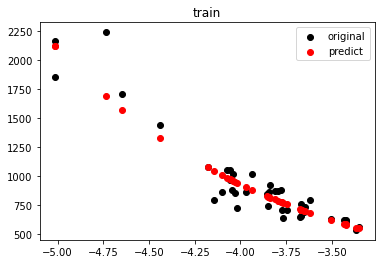

In [17]:
y_pred1=regr.predict(X)
plt.scatter(X,10**Y_val,color='black',label='original')
plt.scatter(X,10**y_pred1,color='red',label='predict')
plt.title('train')
plt.legend()

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
rmse1=np.sqrt(mean_squared_error(10**Y_val,10**y_pred1))
print('train Mean Percent Error, RMSE')
mean_absolute_error(Y_val,y_pred1)*100,rmse1

train Mean Percent Error, RMSE


(3.739904358134776, 128.9470433403474)

In [19]:
Cycle2=[]
VAR2=[]
for i,j in enumerate(batch2.keys()):
    if j=='b2c1':
        continue
    Qdlin10,Qdlin100=bat_dict[j]['cycles']['9']['Qdlin'],bat_dict[j]['cycles']['99']['Qdlin']
    diff=Qdlin100-Qdlin10
    var,cycle=np.var(diff),len(bat_dict[j]['summary']['cycle'])+1
    VAR2.append(var)
    Cycle2.append(cycle)
x_val2=np.array(VAR2)
y_val2=np.array(Cycle2)
X_val2=np.log10(x_val2)
Y_val2=np.log10(y_val2)

In [20]:
X2=X_val2.reshape(-1,1)

X2.shape, Y_val2.shape

((42, 1), (42,))

In [21]:
y_pred=regr.predict(X2)

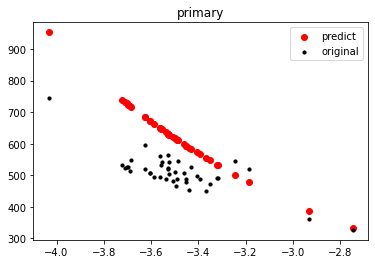

In [22]:
plt.scatter(X2,10**y_pred,color='r',label='predict')
plt.scatter(X_val2,10**Y_val2,color='black',s=10,label='original')
plt.title('primary')
plt.legend()

In [23]:
#  이게 이 값에 대한 rmse 값이 아닌가본데;; 그림 3에 있는 그래프에 대한 rmse 로 보인다.
print('primary Mean Percent Error, RMSE')
rmse=np.sqrt(mean_squared_error(10**Y_val2,10**y_pred))
mean_absolute_error(Y_val2,y_pred)*100,rmse

primary Mean Percent Error, RMSE


(8.701777304915481, 128.09539224879768)

In [24]:
Cycle3=[]
VAR3=[]
for i,j in enumerate(batch3.keys()):
    if j=='b3c42':
        continue
    if j=='b3c16':
        continue
    if j=='b3c17':
        continue
    if j=='b3c43':
        continue
    Qdlin10,Qdlin100=bat_dict[j]['cycles']['9']['Qdlin'],bat_dict[j]['cycles']['99']['Qdlin']
    diff=Qdlin100-Qdlin10
    var,cycle=np.var(diff),len(bat_dict[j]['summary']['cycle'])+1
    VAR3.append(var)
    Cycle3.append(cycle)
x_val3=np.array(VAR3)
y_val3=np.array(Cycle3)
X_val3=np.log10(x_val3)
Y_val3=np.log10(y_val3)

In [25]:
X3=X_val3.reshape(-1,1)

X3.shape, Y_val3.shape

((36, 1), (36,))

In [26]:
y_pred3=regr.predict(X3)

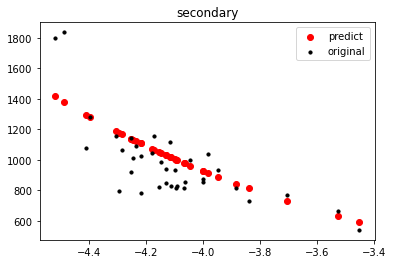

In [27]:
plt.scatter(X3,10**y_pred3,color='r',label='predict')
plt.scatter(X_val3,10**Y_val3,color='black',s=10,label='original')
plt.title('secondary')
plt.legend()

In [28]:
print('secondary Mean Percent Error, RMSE')
rmse3=np.sqrt(mean_squared_error(10**Y_val3,10**y_pred3))
mean_absolute_error(Y_val3,y_pred3)*100,rmse3

secondary Mean Percent Error, RMSE


(5.381984837853536, 169.4945532691127)

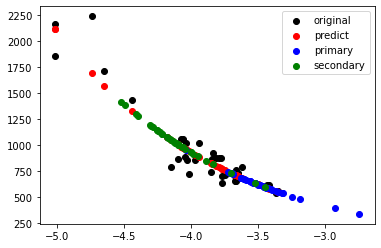

In [29]:
plt.scatter(X,10**Y_val,color='black',label='original')
plt.scatter(X,10**y_pred1,color='red',label='predict')
plt.scatter(X2,10**y_pred,color='blue',label='primary')
plt.scatter(X3,10**y_pred3,color='green',label='secondary')
plt.legend()

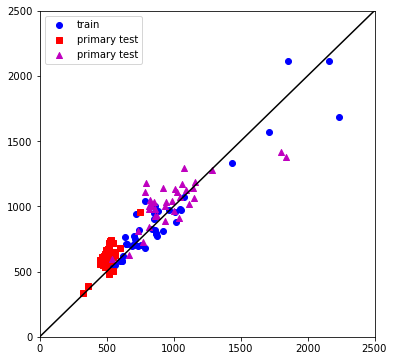

In [30]:
x=[0,2500];y=[0,2500]
plt.figure(figsize=(6,6))
plt.plot(x,y,c='black')
plt.scatter(10**Y_val,10**y_pred1,color='b',marker='o',label='train')
plt.scatter(10**Y_val2,10**y_pred,color='r',marker='s',label='primary test')
plt.scatter(10**Y_val3,10**y_pred3,color='m',marker='^',label='primary test')
plt.axis([0,2500,0,2500])
plt.legend()

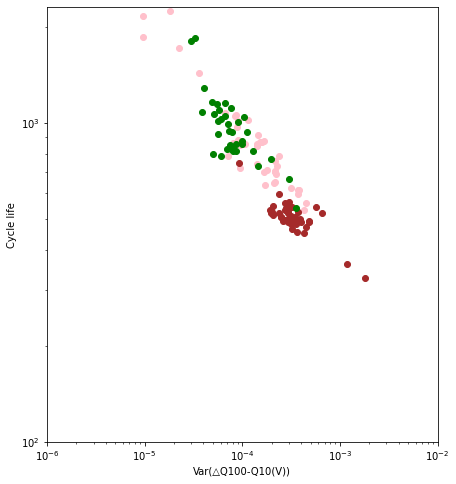

In [34]:
plt.figure(figsize=(7,8))
plt.scatter(10**X,10**Y_val,color='red',)
plt.scatter(10**X_val2,10**Y_val2,color='brown')
plt.scatter(10**X_val3,10**Y_val3,color='green')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Q100-Q10')
plt.ylabel('Voltage(V)')
plt.axis([10**(-6),10**(-2),100,2300])
plt.xlabel('Var(△Q100-Q10(V))')
plt.ylabel('Cycle life')
plt.show()